In [33]:
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
import scipy
from scipy.sparse.linalg import svds 

In [2]:
data = pd.read_csv("mirnas_all.txt", sep="\t")
labels = pd.read_csv("mirnas_labels_all.txt", sep="\t")

In [3]:
data.head()

,Unnamed: 0,GSM279964,GSM279974,GSM279975,GSM279977,GSM279978,GSM279958,GSM279961,GSM279963,GSM279965,...,GSM2263282.1,GSM2263284.1,GSM2263287.1,GSM2263288.1,GSM2263292.1,GSM2263294.1,GSM2263295.1,GSM2263298.1,GSM2263299.1,GSM2263302.1
0,1007_s_at,10.022909,9.818693,9.647424,9.841938,9.190691,10.214065,10.284017,7.008211,9.145673,...,8.647694,9.525532,9.248846,9.306287,9.145314,8.530944,8.081856,8.434029,8.726478,8.131775
1,1053_at,6.411660,5.665370,5.613482,5.190008,5.180046,6.396298,6.048790,5.671556,5.624627,...,6.397119,6.619812,6.722360,6.426902,6.922576,7.025303,6.750538,6.223376,6.846281,6.917279
2,117_at,6.181633,5.700626,5.786576,5.237599,6.131352,7.620443,6.481317,5.739559,6.072929,...,7.384940,6.108547,7.219937,6.434265,6.027906,7.149351,7.596471,7.694820,6.647473,7.124813
3,121_at,7.436633,7.053211,7.258615,7.562595,7.330315,7.364233,7.421833,7.620457,7.507055,...,9.614226,9.309642,9.291900,9.807605,9.701834,8.903797,8.225796,8.990390,9.270007,10.512534
4,1255_g_at,2.887094,3.000947,3.121344,3.086248,3.480671,2.905494,2.968376,3.221801,3.069448,...,3.487416,3.369951,3.571586,3.324024,3.689759,3.515181,3.414399,3.292489,3.466469,3.369423


In [4]:
data = data.set_index("Unnamed: 0")

In [5]:
labels.tail()

,Unnamed: 0,dataset_id,class_id,class_name,sample_id,cancer_type,cancer_subtype,metastasis_status,primary_site,metastasis_site,sample_label
1693,723,GSE85258,2,primary tumor,GSM2263294,kindey cancer,clear cell renal cell carcinoma,YES,kindey,lung,Primary Tumor
1694,724,GSE85258,2,primary tumor,GSM2263295,kindey cancer,clear cell renal cell carcinoma,YES,kindey,lung,Primary Tumor
1695,725,GSE85258,2,primary tumor,GSM2263298,kindey cancer,clear cell renal cell carcinoma,YES,kindey,lung,Primary Tumor
1696,726,GSE85258,2,primary tumor,GSM2263299,kindey cancer,clear cell renal cell carcinoma,YES,kindey,lung,Primary Tumor
1697,727,GSE85258,2,primary tumor,GSM2263302,kindey cancer,clear cell renal cell carcinoma,YES,kindey,lung,Primary Tumor


In [6]:
data.head()

,GSM279964,GSM279974,GSM279975,GSM279977,GSM279978,GSM279958,GSM279961,GSM279963,GSM279965,GSM279966,...,GSM2263282.1,GSM2263284.1,GSM2263287.1,GSM2263288.1,GSM2263292.1,GSM2263294.1,GSM2263295.1,GSM2263298.1,GSM2263299.1,GSM2263302.1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1007_s_at,10.022909,9.818693,9.647424,9.841938,9.190691,10.214065,10.284017,7.008211,9.145673,9.437047,...,8.647694,9.525532,9.248846,9.306287,9.145314,8.530944,8.081856,8.434029,8.726478,8.131775
1053_at,6.411660,5.665370,5.613482,5.190008,5.180046,6.396298,6.048790,5.671556,5.624627,5.645465,...,6.397119,6.619812,6.722360,6.426902,6.922576,7.025303,6.750538,6.223376,6.846281,6.917279
117_at,6.181633,5.700626,5.786576,5.237599,6.131352,7.620443,6.481317,5.739559,6.072929,6.017919,...,7.384940,6.108547,7.219937,6.434265,6.027906,7.149351,7.596471,7.694820,6.647473,7.124813
121_at,7.436633,7.053211,7.258615,7.562595,7.330315,7.364233,7.421833,7.620457,7.507055,7.529658,...,9.614226,9.309642,9.291900,9.807605,9.701834,8.903797,8.225796,8.990390,9.270007,10.512534
1255_g_at,2.887094,3.000947,3.121344,3.086248,3.480671,2.905494,2.968376,3.221801,3.069448,3.048298,...,3.487416,3.369951,3.571586,3.324024,3.689759,3.515181,3.414399,3.292489,3.466469,3.369423


In [7]:
pca = PCA(n_components=1000)

In [13]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=1000, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca.n_features_

1698

In [23]:
def PCA(x, k):
    # Z = W * X
    # Z is weight matrix 
    # W is feature matrix 
    # X is input 
    
    # get zero mean, column-wise
    means = np.mean(x.T, axis=1)
    x_mean = x - means
    
    # covariance of centered/zero-mean matrix
    #V = np.cov(x_mean)
    V = x_mean.dot(x_mean.T) / (x_mean.shape[1]-1)

    # eigendecomposition 
    # y = lambda (eigen values)
    # u = eigen vectors 
    y, u = scipy.sparse.linalg.eigsh(V, k = k)
    
    # project data
    #P = u.T.dot(x_mean)
    

    # diagonalization to get feature matrix 
    #w = np.dot(np.diag(1/np.sqrt(y)), u.T)
    
    # w is features 
    #w = np.diag( 1.0/np.sqrt(y)).dot(u.T)
    w = np.linalg.inv(np.diag(np.sqrt(y))).dot(u.T)
    print(np.diag(np.sqrt(y)).shape)
    # check identity 
    # print(np.round(np.dot(np.dot(w,V),w.T),3))
    
    # z is weights 
    z = np.dot(w, x_mean)
    
    return w, z, y, u

In [43]:
def PCA(PCA_K, input_data):

    total_dim, sample_n = input_data.shape

    data_mean = np.reshape(np.mean(input_data, axis=1),(total_dim,1))
    data_demean = np.subtract(input_data, data_mean)

    u, s, vt = svds(data_demean, k=PCA_K)

    PCA_weights = np.matmul(np.transpose(u), data_demean)
    
    return PCA_weights, u, s, data_mean

In [25]:
np_data = np.array(data)

In [92]:
s[300:373]

array([  235016.61123478,   238107.26624637,   238214.60695532,
         241066.16411343,   242126.50200996,   244597.17613921,
         246509.37923058,   247704.82068801,   250757.12921508,
         253582.53034165,   255678.7744133 ,   258679.85460432,
         259893.03102034,   262565.48434627,   263946.21750485,
         267464.30786959,   269600.85029972,   270580.10052173,
         272049.33280139,   276591.88285661,   278053.20518731,
         281277.09147251,   284623.26912517,   286536.11519114,
         289975.88516932,   291239.94553418,   294941.62440171,
         301776.31855185,   304979.18349881,   310531.39560455,
         313113.71107269,   314703.26853432,   321483.00492026,
         324108.67697171,   329577.9971609 ,   330779.16945124,
         336868.3229887 ,   340489.12815496,   341862.36649245,
         349020.41213   ,   354865.39158193,   358353.67164149,
         360603.36942451,   368442.87569788,   373416.79431686,
         378542.71081928,   394397.50975

In [30]:
temp = np_data[:,:100]

In [31]:
temp.shape

(100, 100)

In [76]:
weights, u, s, mean = PCA(500,np_data)

In [95]:
transformed = np.matmul(np.transpose(u[:,300:373]), np.subtract(np_data,mean))

In [96]:
transformed.shape

(73, 1698)

### playing around with pca
s is the singular values 
we chose cut off of ~ 50-73

In [77]:
max(s)

12618202.875370225

In [81]:
len(s)

500

In [88]:
len(s[s>0])

373

<Container object of 373 artists>

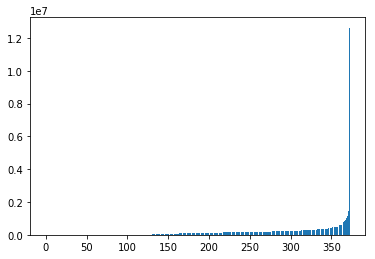

In [89]:
plt.bar(xrange(0,len(s[s>0])), s[s>0])

In [86]:
weights.shape

(500, 1698)

In [15]:
print(pca.components_)

[[ 1.92404425e-05  1.89879554e-05  1.87210838e-05 ...  1.79816449e-05
   1.79638356e-05  1.83409387e-05]
 [-2.32008440e-05 -1.38628442e-05 -1.91757464e-05 ... -1.10316424e-05
  -7.77321080e-06 -1.82133943e-05]
 [-1.09548366e-04 -1.12643017e-04 -1.01747775e-04 ... -1.04244991e-04
  -1.02050689e-04 -1.06546323e-04]
 ...
 [-8.26850968e-05 -4.94405040e-04  3.62189075e-04 ... -5.91256807e-05
  -1.47483906e-04 -2.24202791e-04]
 [ 1.36781718e-04 -3.04754676e-04  4.04794709e-04 ... -1.10144739e-05
  -1.07453848e-04  7.96010296e-05]
 [ 1.97906437e-05 -1.87920275e-04  2.21390959e-04 ... -1.15496058e-04
  -2.96843395e-05  7.47137095e-05]]
